## Examples

### Basic Usage

#### MLE

In [1]:
import kldmwr.univar
import scipy.stats


def norm_pdf(x, p):
    return scipy.stats.norm.pdf(x, loc=p[0], scale=p[1])


x = [0.12, -0.62, 1.16, -0.31, -0.02, -0.99, -0.45,  0.17]
p_i = [0, 1]
res = kldmwr.univar.find_mle(x, p_i, norm_pdf)
print(res[0])
print(res)


[-0.11747087  0.60645557]
(array([-0.11747087,  0.60645557]), 7.350032644753719, True,  final_simplex: (array([[-0.11747087,  0.60645557],
       [-0.11748272,  0.60636968],
       [-0.11740537,  0.60641523]]), array([7.35003264, 7.35003266, 7.3500327 ]))
           fun: 7.350032644753719
       message: 'Optimization terminated successfully.'
          nfev: 103
           nit: 54
        status: 0
       success: True
             x: array([-0.11747087,  0.60645557]))


#### ZGE (Zero-boundary Galerkin Estimator) or JMMPSE (Jiang's modified MPS estimator)

In [2]:
import kldmwr.univar
import scipy.stats


def norm_cdf(x, p):
    return scipy.stats.norm.cdf(x, loc=p[0], scale=p[1])


x = [0.12, -0.62, 1.16, -0.31, -0.02, -0.99, -0.45,  0.17]
p_i = [0, 1]
res = kldmwr.univar.find_gln(x, p_i, norm_cdf)
print(res[0])


[-0.11059383  0.80750186]


#### NGE (Nonzero-boundary Galerkin estimator) or MPSE (traditionl one) 

In [3]:
import kldmwr.univar
import scipy.stats


def norm_cdf(x, p):
    return scipy.stats.norm.cdf(x, loc=p[0], scale=p[1])


x = [0.12, -0.62, 1.16, -0.31, -0.02, -0.99, -0.45,  0.17]
p_i = [0, 1]
res = kldmwr.univar.find_glz(x, p_i, norm_cdf)
print(res[0])


[-0.13663485  0.62631407]


### Advanced Usage


#### Giving varying initial values of parameters.

* $\texttt{p_is}$

In [4]:
import kldmwr.univar
import numpy as np
import scipy.stats


def gev_cdf(y, p):

    if p[2] * p[2] < 1e-25:
        return np.exp(- np.exp(- (y - p[0]) / p[1]))
    else:
        return np.exp(- (1. + p[2] * (y - p[0]) / p[1]) ** (- 1.0 / p[2]))


x = [-0.29505663, -0.10061241,  0.93107122,  1.25161993,  1.31516917,
     1.39300232,  1.42739514,  1.49512478,  1.49936167, 1.49981574]
p_0 = np.array([1, 1, -2])

################################################################################
# initial values of parameters, p_is

n_gen = 50
n_int = 20
mu_pls = np.random.uniform(0, .4, size=n_gen)
sg_pls = np.random.uniform(-0.5, 0.5, size=n_gen)
p_0t = p_0.reshape(3, 1)
p_0s = np.repeat(p_0t, n_gen, axis=1)
p_gs = p_0s + np.array([mu_pls, sg_pls, np.zeros(n_gen)]) 
p_gs = p_gs.transpose()
p_gsels = []
for p_g in p_gs:
    if 1 + p_g[2] * (x[-1] - p_g[0]) / p_g[1] > 0 and\
        1 + p_g[2] * (x[0] - p_g[0]) / p_g[1] > 0:
        p_gsels.append(p_g)

p_is = np.array(p_gsels)
p_is = p_is[:n_int]

################################################################################

res_a = kldmwr.univar.find_min_viv_expl(
    x, p_0, kldmwr.univar.find_gln, gev_cdf,
    p_ints=p_is
)

print('res_a[0]', res_a[0])
df = res_a[3]
df

/home/takuya/pyenvs/webtknuc/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in power
  # This is added back by InteractiveShellApp.init_path()


res_a[0] [ 1.2629164   0.70137527 -2.95966315]


,loc,scl,shp,mmps,success,p_i_loc,p_i_scl,p_i_shp
0,1.261768,0.699916,-2.939230,29.254062,1.0,1.358013,1.047873,-2.0
1,1.262987,0.701175,-2.959704,29.253820,1.0,1.114096,1.126918,-2.0
2,1.262913,0.701387,-2.959671,29.253820,1.0,1.109013,1.347618,-2.0
3,1.243007,0.792040,-3.083343,29.268254,1.0,1.362257,1.413035,-2.0
4,1.226017,0.851033,-3.107484,29.281626,1.0,1.395142,1.196544,-2.0
5,1.263206,0.705659,-2.981413,29.254095,1.0,1.228003,1.412565,-2.0
6,1.263718,0.562029,-2.378648,29.532230,1.0,1.099163,1.052106,-2.0
7,1.262933,0.701327,-2.959663,29.253820,1.0,1.132047,1.444300,-2.0
8,1.298868,0.517241,-2.572315,29.410884,1.0,1.307570,0.769314,-2.0
9,1.134361,1.105910,-3.025497,29.360386,1.0,1.086541,1.038617,-2.0


Text(0, 0.5, '$\\hat \\sigma$')

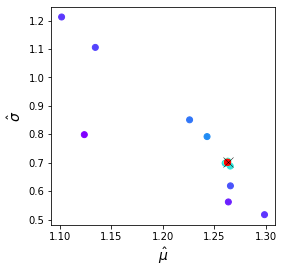

In [5]:
import matplotlib.pyplot as plt


cm = plt.cm.get_cmap('rainbow')
dfs = df.sort_values('mmps', ascending=False)

fig, ax1 = plt.subplots(figsize=(4, 4))
ax1.scatter(dfs['loc'], dfs['scl'], marker='o', 
           c= -np.log(1 + 1e-9 - (dfs['mmps'].max() - dfs['mmps']) / (dfs['mmps'].max() - dfs['mmps'].min())), 
           cmap=cm)

ax1.scatter(res_a[0][0], res_a[0][1], marker='x', s=100, lw=.5, c='k') 
ax1.set_xlabel('$\hat \mu$', fontsize=14)
ax1.set_ylabel('$\hat \sigma$', fontsize=14)